# SVM-SUPPORT VECTOR MACHINE

In [ ]:
supervised machine learning alogorithm

IT CAN BE USED FOR REGREESION AND CLASSIFICATION. BUT MOSLTY USED FOR CLASSIFICATION

1.LINEAR SVM(lINEARLY SEPARABLE DATA)
2.NON LINEAR SVM

REGULARIZATION(C) ->HIGH REGULARISATION (C) AND LOW REGULARISATION(C)
DEFAULT VALUE FOR C IS 1.0
WE USED TO APPLY C IN NOLINEAR SVM

HIGH GAMMA AND LOW GAMMA
HIGH GAMMA-IT WILL CONSIDER CLOSEST VALUES AS SUPPORT VECTOR(NOT A STRIAGHTLINE)
LOW GAMMA=IT WILL CONSIDER WIDER RANGE VALUES(STRAIGHTLINE)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris# data taken from sklearn datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [271]:
iris.data[:150,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [273]:
#iris_table

In [302]:
x=pd.DataFrame(data=iris.data,columns=iris.feature_names)
y=iris.target


In [275]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [303]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [277]:
#model=SVC()#it will be "rbf" kernal by default, for better result we can use nonlinear kernals.

In [278]:
#model=SVC(kernel='rbf')# gaussian kernal for nonlinear data
#model=SVC(kernel="poly",degree=8)

In [306]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [307]:
model4=SVC(C=2.5,gamma="auto")
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9333333333333333

In [308]:
model=SVC(kernel='linear',C=2.5,gamma="auto")
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

In [309]:
model1=SVC(kernel="rbf",C=2.5,gamma="auto")
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9333333333333333

In [310]:
model2=SVC(kernel="poly",degree=2,C=2.5,gamma="auto")#C>0
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9333333333333333

In [311]:
model3=SVC(kernel="sigmoid",C=1,gamma="scale")#gamma ="scale " is default. that means gamma="scale will not make any diffrence"
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.3

In [312]:
#another way of finding score
from sklearn.metrics import accuracy_score
y_pred=model3.predict(x_test)
accuracy_score(y_pred,y_test)

0.3

In [313]:
ypred=model.predict(x_test)

In [314]:
ypred

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2])

In [315]:
ypred1=model1.predict(x_test)
ypred1

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2])

In [316]:
ypred2=model2.predict(x_test)
ypred2

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2])

In [317]:
ypred3=model3.predict(x_test)
ypred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [318]:
cm=confusion_matrix(ypred,y_test)

In [319]:
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

<Figure size 3600x3600 with 0 Axes>

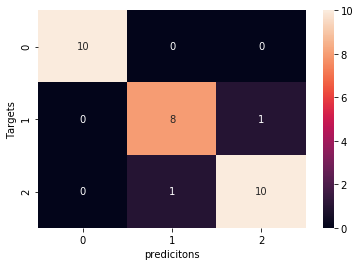

<Figure size 3600x3600 with 0 Axes>

In [320]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicitons')
plt.ylabel('Targets')
plt.figure(figsize=(50,50))

In [321]:
#ploting hyperplane

In [322]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.decomposition import PCA#PRINCIPAL COMPONENT ANALYSIS
from mlxtend.plotting import plot_decision_regions

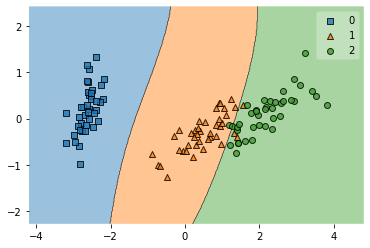

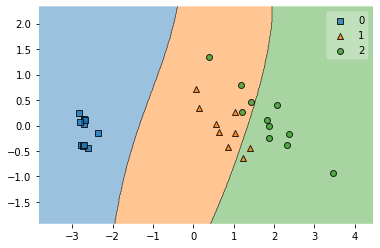

In [326]:
pca=PCA(n_components=2)#DIMENSIONALITY REDUCTION METHOD, to reduce the feutures to 2, coz we have 4 feature here and then plot will be diifficult
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)
svm_pca=SVC()#model
svm_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca)

In [325]:
svm_pca.score(x_test_pca,y_test)

0.8

0.8

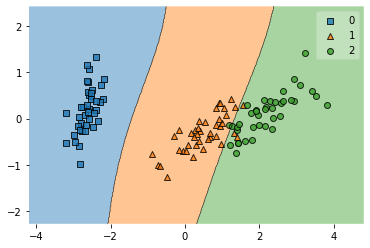

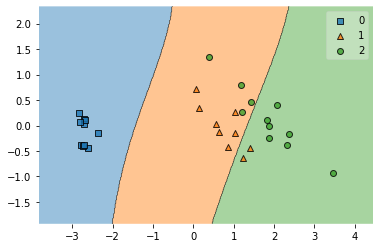

In [327]:
svm_pca1=SVC(C=2.5,gamma="scale")#model
svm_pca1.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca1)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca1)
svm_pca1.score(x_test_pca,y_test)

0.8

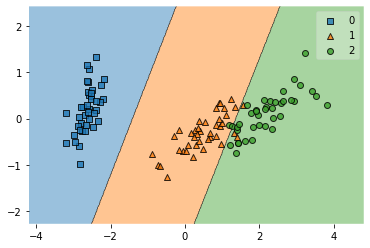

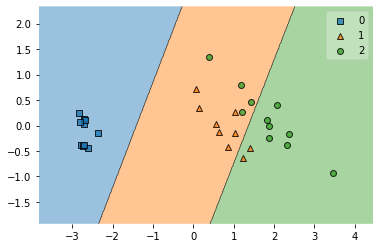

In [328]:
svm_pca2=SVC(kernel='linear',C=3,gamma="auto")#model
svm_pca2.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca2)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca2)
svm_pca2.score(x_test_pca,y_test)

0.8

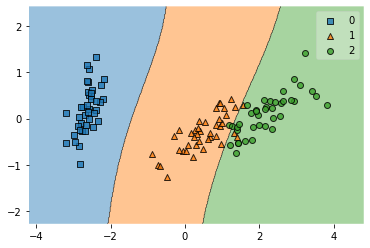

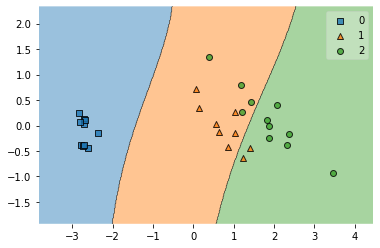

In [329]:
svm_pca3=SVC(kernel="rbf",C=4,gamma="scale")#model
svm_pca3.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca3)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca3)
svm_pca3.score(x_test_pca,y_test)

0.5666666666666667

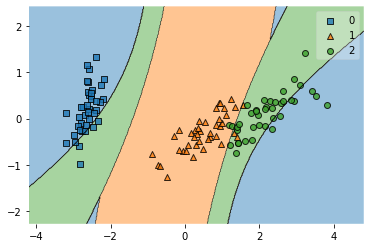

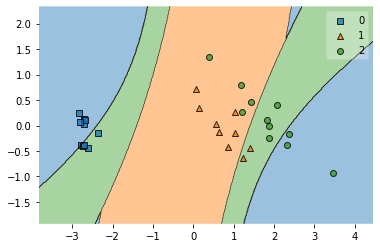

In [336]:
svm_pca4=SVC(kernel="poly",degree=2,C=2.5,gamma="scale")#model
svm_pca4.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca4)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca4)
svm_pca4.score(x_test_pca,y_test)

0.6666666666666666

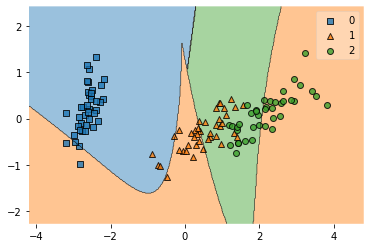

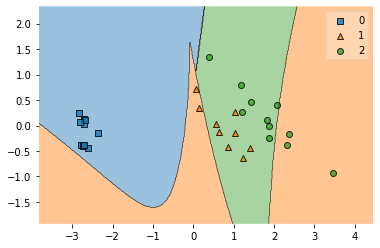

In [339]:
svm_pca5=SVC(kernel="sigmoid",C=10,gamma="auto")#model
svm_pca5.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca5)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca5)
svm_pca5.score(x_test_pca,y_test)

0.8

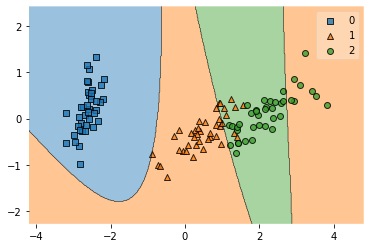

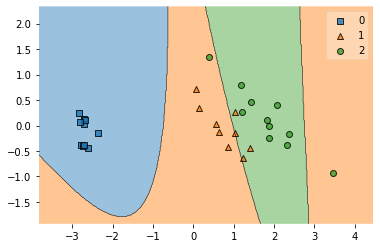

In [340]:
svm_pca6=SVC(kernel="sigmoid",C=10,gamma="scale")#model
svm_pca6.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca6)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca6)
svm_pca6.score(x_test_pca,y_test)

In [ ]:
#dataset sent by ms.shaymily hw

In [20]:
data1=pd.read_csv("bill_authentication.csv")
data1

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [21]:
data1.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [22]:
x=data1.drop("Class",axis=1)
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [23]:
y=data1["Class"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [25]:
modeld1=SVC()

In [26]:
modeld1.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
modeld1.score(x_test,y_test)

1.0

In [28]:
modeld2=SVC(kernel="linear")
modeld2.fit(x_train,y_train)
modeld2.score(x_test,y_test)

0.9890909090909091

In [29]:
modeld3=SVC(kernel="poly",degree=2)
modeld3.fit(x_train,y_train)
modeld3.score(x_test,y_test)

0.9818181818181818

In [30]:
modeld4=SVC(kernel="sigmoid")
modeld4.fit(x_train,y_train)
modeld4.score(x_test,y_test)

0.6945454545454546

In [31]:
modeld5=SVC(kernel="rbf")
modeld5.fit(x_train,y_train)
modeld5.score(x_test,y_test)

1.0

In [39]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)

In [ ]:
svm_pca3=SVC(kernel="rbf",C=4,gamma="scale")#model
svm_pca3.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca3)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca3)
svm_pca3.score(x_test_pca,y_test)

<Figure size 432x288 with 0 Axes>

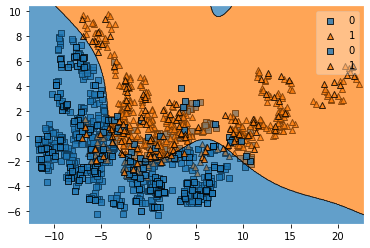

<Figure size 432x288 with 0 Axes>

In [42]:
modeld1_pca=SVC()
modeld1_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train.to_numpy(),clf=modeld1_pca)
plot_decision_regions(x_test_pca,y_test.to_numpy(),clf=modeld1_pca)
plt.figure()

In [47]:
modeld1_pca.score(x_test_pca,y_test)

0.8109090909090909

<Figure size 432x288 with 0 Axes>

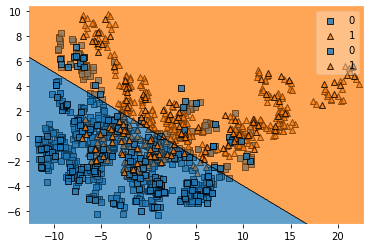

<Figure size 432x288 with 0 Axes>

In [43]:
modeld2_pca=SVC(kernel="linear")
modeld2_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train.to_numpy(),clf=modeld2_pca)
plot_decision_regions(x_test_pca,y_test.to_numpy(),clf=modeld2_pca)
plt.figure()

In [49]:
modeld2_pca.score(x_test_pca,y_test)

0.7381818181818182

<Figure size 432x288 with 0 Axes>

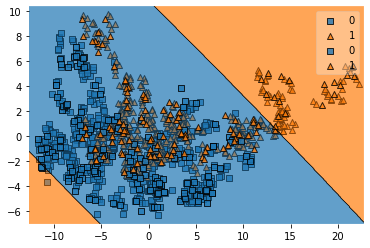

<Figure size 432x288 with 0 Axes>

In [50]:
modeld3_pca=SVC(kernel="poly",degree=2)
modeld3_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train.to_numpy(),clf=modeld3_pca)
plot_decision_regions(x_test_pca,y_test.to_numpy(),clf=modeld3_pca)
plt.figure()

In [51]:
modeld3_pca.score(x_test_pca,y_test)

0.6218181818181818

<Figure size 432x288 with 0 Axes>

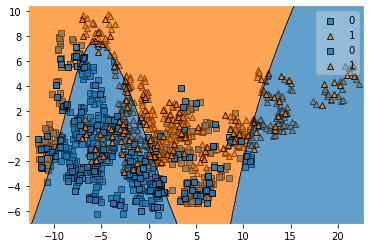

<Figure size 432x288 with 0 Axes>

In [54]:
modeld4_pca=SVC(kernel="sigmoid")
modeld4_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train.to_numpy(),clf=modeld4_pca)
plot_decision_regions(x_test_pca,y_test.to_numpy(),clf=modeld4_pca)
plt.figure()

In [56]:
modeld4_pca.score(x_test_pca,y_test)

0.5272727272727272

<Figure size 432x288 with 0 Axes>

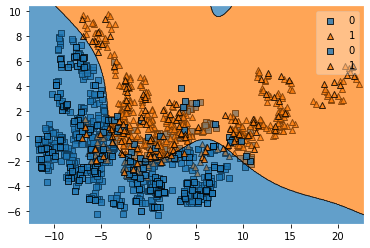

<Figure size 432x288 with 0 Axes>

In [53]:
modeld5_pca=SVC(kernel="rbf")
modeld5_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train.to_numpy(),clf=modeld5_pca)
plot_decision_regions(x_test_pca,y_test.to_numpy(),clf=modeld5_pca)
plt.figure()

In [57]:
modeld5_pca.score(x_test_pca,y_test)

0.8109090909090909

In [34]:
ypredd1=modeld1.predict(x_test)

In [35]:
cm1=confusion_matrix(ypredd1,y_test)
cm1

array([[155,   0],
       [  0, 120]], dtype=int64)

<Figure size 3600x3600 with 0 Axes>

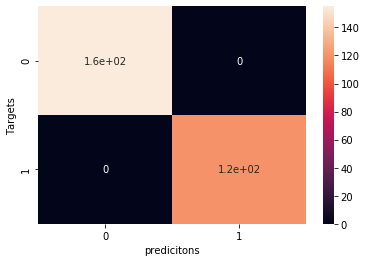

<Figure size 3600x3600 with 0 Axes>

In [36]:
sns.heatmap(cm1,annot=True)
plt.xlabel('predicitons')
plt.ylabel('Targets')
plt.figure(figsize=(50,50))